# Checking Data and CIGALE's output

In [1]:
# Regular packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import os
from matplotlib.legend_handler import HandlerPathCollection
import pandas as pd

%matplotlib inline

In [183]:
# COSMOS and GOODSS CIGALE output
# Results and Mock data after fitting Ha, Hb, and OIII lines

COSMOS = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/COSMOS_HaOIII.fits', format = 'fits')

COSMOS_HaOIII_results = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/COSMOS_HaOIII/results.fits', format = 'fits')
COSMOS_HaOIII_mock = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/COSMOS_HaOIII/results_mock.fits', format = 'fits')

GOODSS = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/GOODSS_HaOIII.fits', format = 'fits')

GOODSS_HaOIII_results = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/GOODSS_HaOIII/results.fits', format = 'fits')
GOODSS_HaOIII_mock = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/GOODSS_HaOIII/results_mock.fits', format = 'fits')

In [184]:
# This has -inf values reported for the bayes

COSMOS_HaOIII_results['bayes.param.IRX'][np.isneginf(COSMOS_HaOIII_results['bayes.param.IRX'])] = -99.999
COSMOS_HaOIII_mock['bayes.param.IRX'][np.isneginf(COSMOS_HaOIII_mock['bayes.param.IRX'])] = -99.999

GOODSS_HaOIII_results['bayes.param.IRX'][np.isneginf(GOODSS_HaOIII_results['bayes.param.IRX'])] = -99.999
GOODSS_HaOIII_mock['bayes.param.IRX'][np.isneginf(GOODSS_HaOIII_mock['bayes.param.IRX'])] = -99.999

In [209]:
# bayes = ['bayes.attenuation.E_BV_factor','bayes.attenuation.E_BV_lines',\
#                                'bayes.attenuation.FUV','bayes.attenuation.V_B90',\
#                                'bayes.attenuation.powerlaw_slope','bayes.dust.alpha',\
#                                'bayes.dust.qpah','bayes.dust.umin','bayes.nebular.logU',\
#                                'bayes.param.IRX','bayes.sfh.age_burst','bayes.sfh.age_main',\
#                                'bayes.sfh.f_burst','bayes.sfh.tau_main','bayes.dust.luminosity',\
#                                'bayes.dust.mass','bayes.sfh.sfr10Myrs','bayes.stellar.m_gas',\
#                                'bayes.stellar.m_star']

# best = ['best.attenuation.E_BV_factor','best.attenuation.E_BV_lines',\
#                                'best.attenuation.FUV','best.attenuation.V_B90',\
#                                'best.attenuation.powerlaw_slope','best.dust.alpha',\
#                                'best.dust.qpah','best.dust.umin','best.nebular.logU',\
#                                'best.param.IRX','best.sfh.age_burst','best.sfh.age_main',\
#                                'best.sfh.f_burst','best.sfh.tau_main','best.dust.luminosity',\
#                                'best.dust.mass','best.sfh.sfr10Myrs','best.stellar.m_gas',\
#                                'best.stellar.m_star']

bayes = ['bayes.attenuation.E_BV_factor','bayes.attenuation.E_BV_lines',\
                               'bayes.attenuation.FUV','bayes.attenuation.V_B90',\
                               'bayes.attenuation.powerlaw_slope','bayes.dust.alpha',\
                               'bayes.dust.qpah','bayes.dust.umin','bayes.nebular.logU',\
                               'bayes.sfh.age_burst','bayes.sfh.age_main',\
                               'bayes.sfh.f_burst','bayes.sfh.tau_main','bayes.dust.luminosity',\
                               'bayes.dust.mass','bayes.sfh.sfr10Myrs','bayes.stellar.m_gas',\
                               'bayes.stellar.m_star']

best = ['best.attenuation.E_BV_factor','best.attenuation.E_BV_lines',\
                               'best.attenuation.FUV','best.attenuation.V_B90',\
                               'best.attenuation.powerlaw_slope','best.dust.alpha',\
                               'best.dust.qpah','best.dust.umin','best.nebular.logU',\
                               'best.sfh.age_burst','best.sfh.age_main',\
                               'best.sfh.f_burst','best.sfh.tau_main','best.dust.luminosity',\
                               'best.dust.mass','best.sfh.sfr10Myrs','best.stellar.m_gas',\
                               'best.stellar.m_star']

                               
flux = ['galex.NUV',\
        'cfht.megacam.u','subaru.suprime.B','subaru.suprime.V','subaru.suprime.r',\
        'subaru.suprime.i','subaru.suprime.z','subaru.hsc.y','UKIRT_WFCJ','cfht.wircam.H',\
        'WFCAM_K','IRAC1','IRAC2','IRAC3','IRAC4','spitzer.mips.24','herschel.pacs.100',\
        'herschel.pacs.160']

flux_goodss = ['UVIMOS',\
               'hst.wfc.F435W','hst.wfc.F606W','hst.wfc.F755W','hst.wfc.F814W',\
               'ACS_F850LP','WFC3_F098M','WFC3_F105W','hst.wfc3.F125W','hst.wfc3.F160W',\
               'ISAACKs','spitzer.irac.ch1','spitzer.irac.ch2','spitzer.irac.ch3',\
               'spitzer.irac.ch4','spitzer.mips.24','herschel.pacs.70','herschel.pacs.100',\
               'herschel.pacs.160']

flux_hershel = ['herschel.spire.PSW','herschel.spire.PMW','herschel.spire.PLW']

lines_flux = ['line.NII-654.8+line.H-alpha+line.NII-658.4', 'line.H-beta', 'line.OIII-500.7']

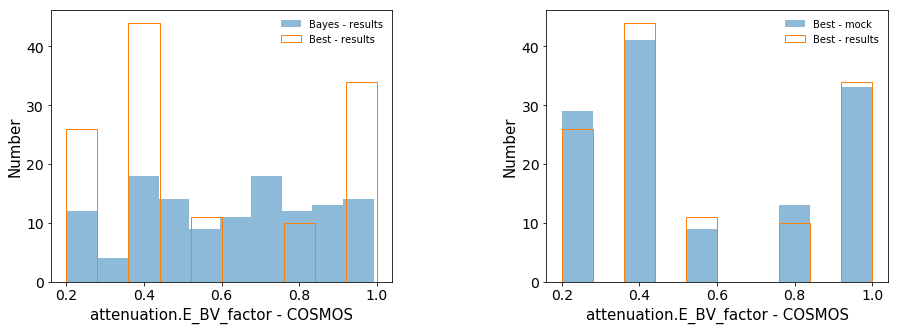

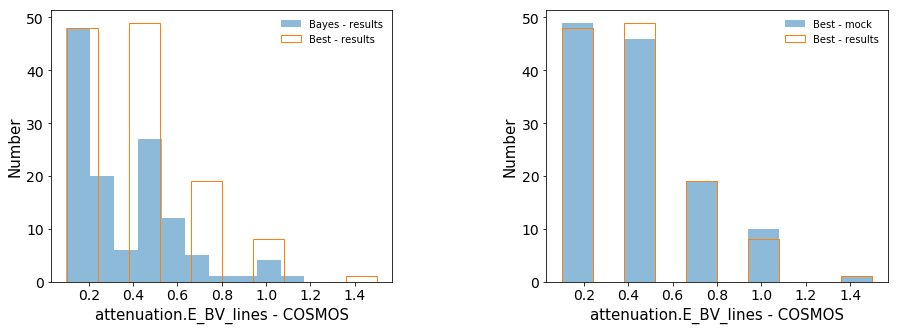

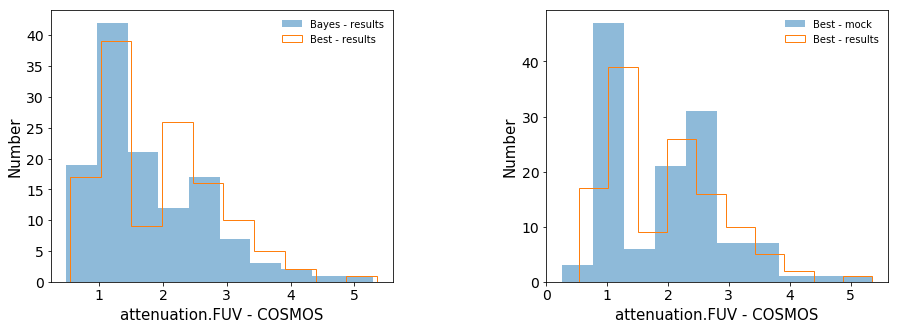

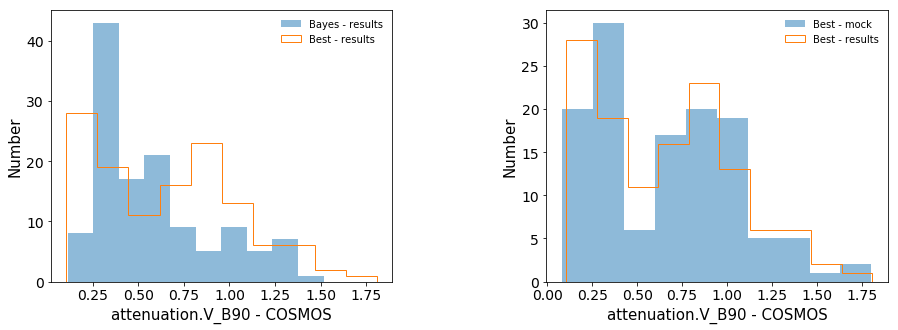

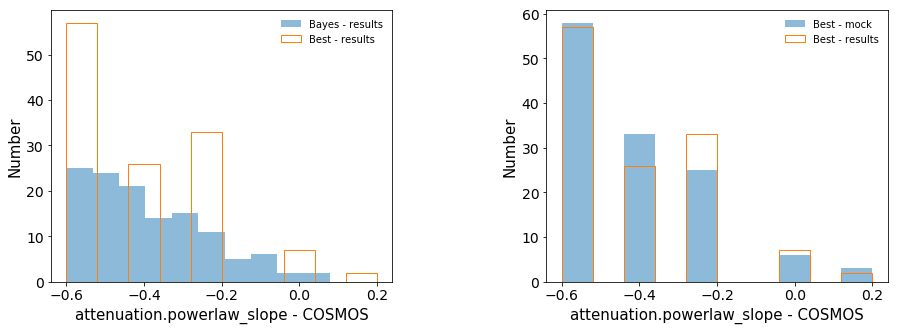

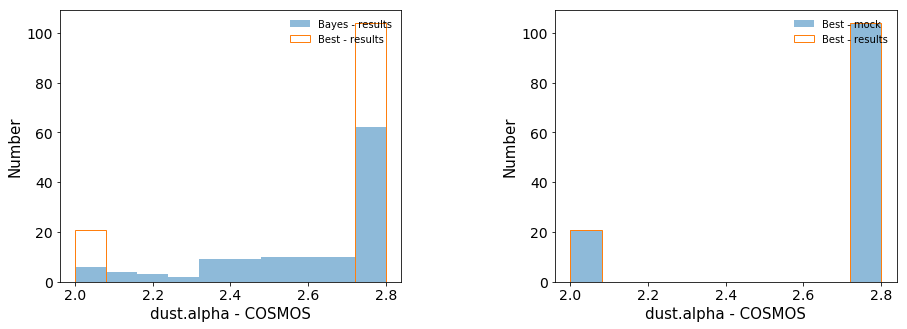

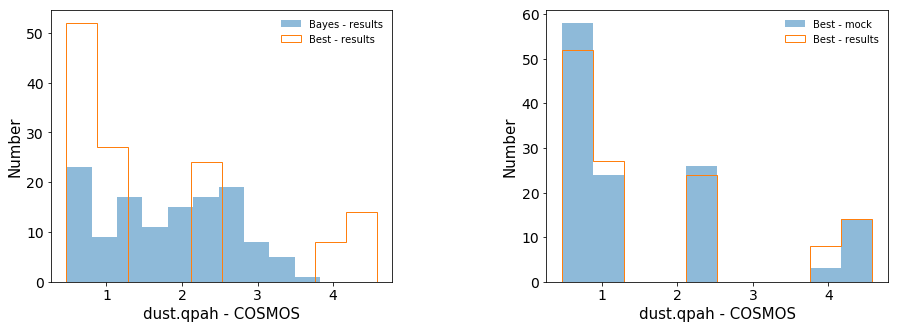

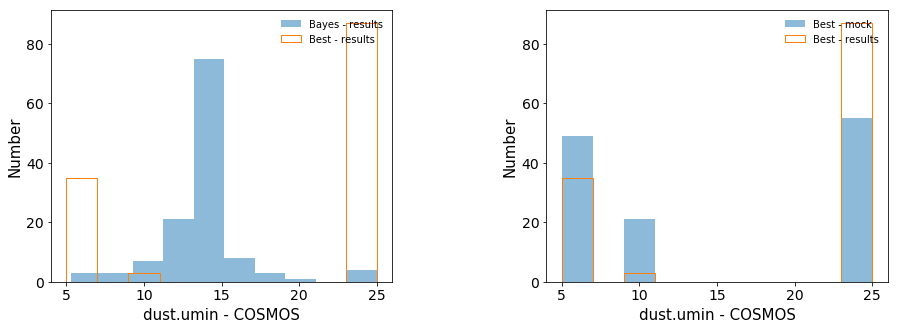

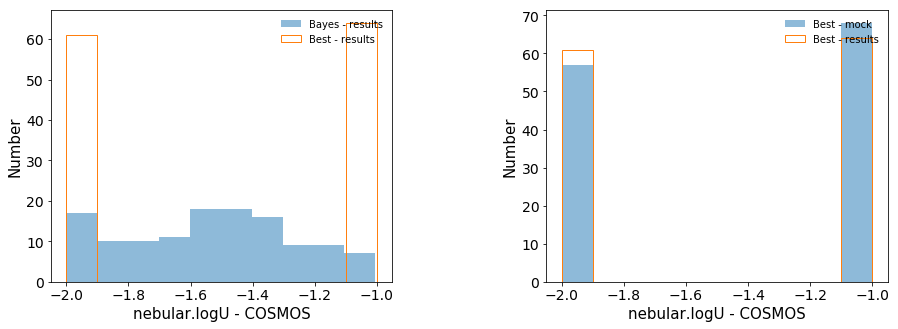

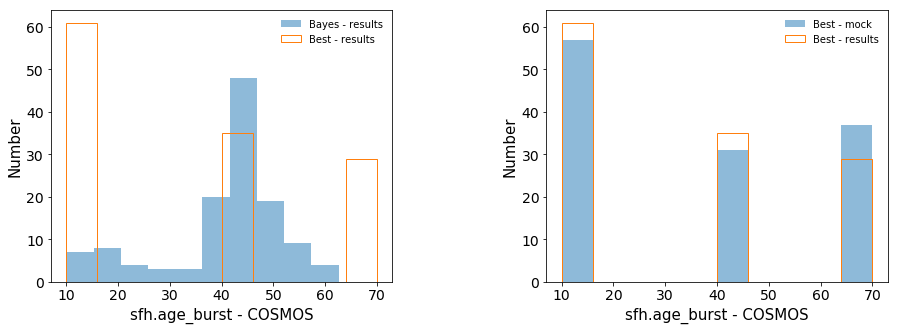

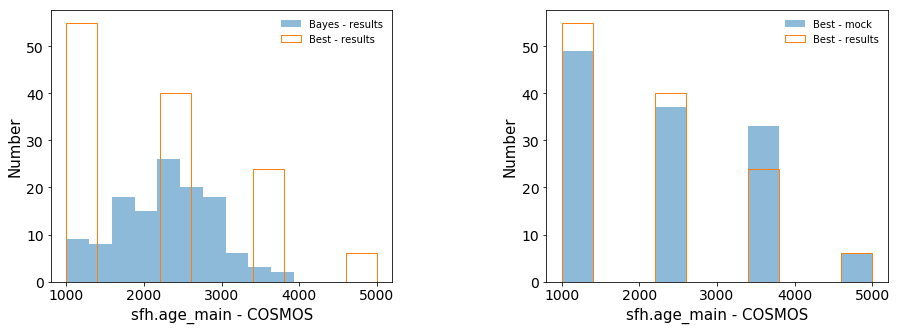

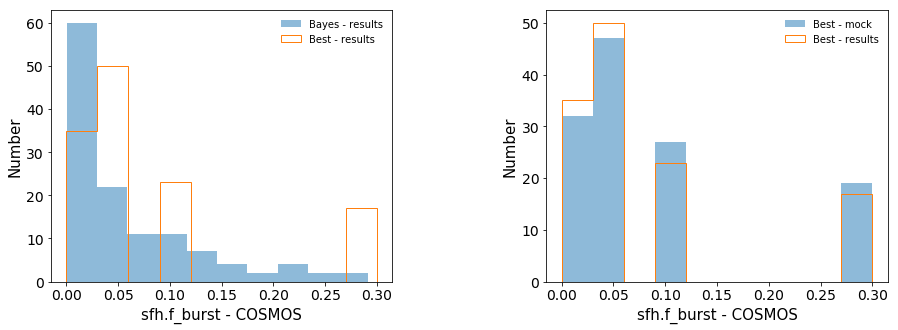

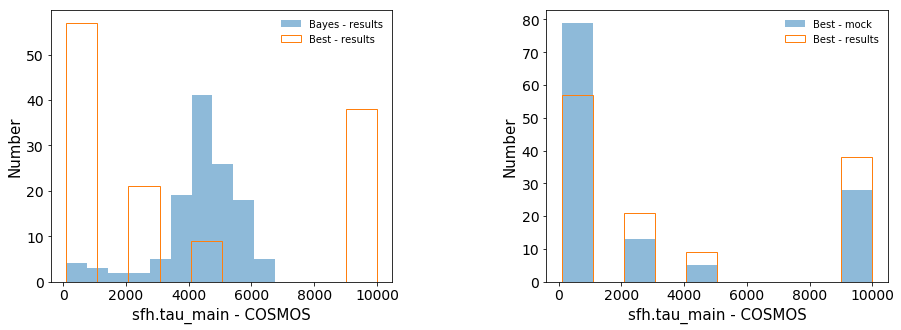

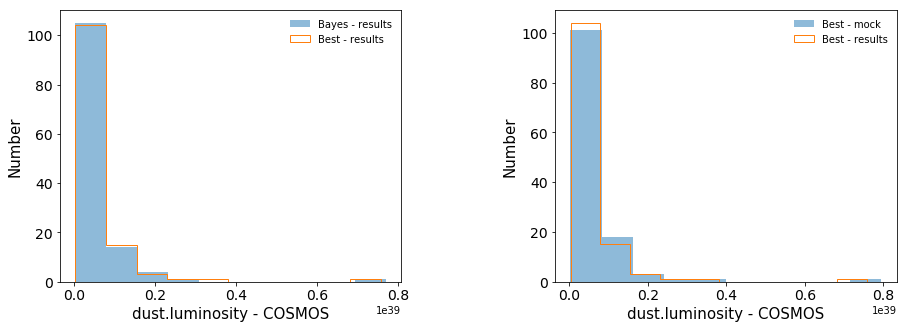

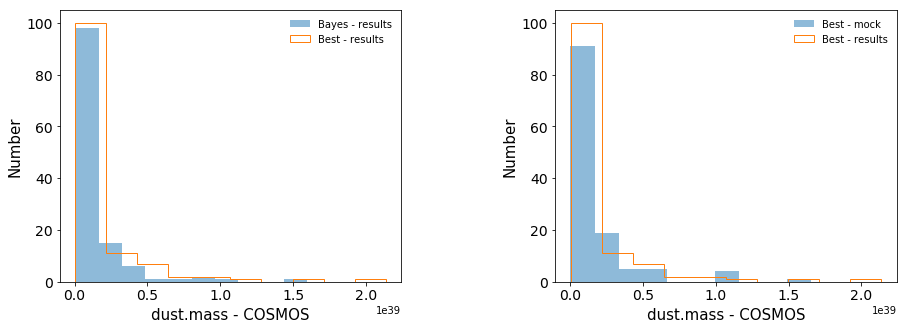

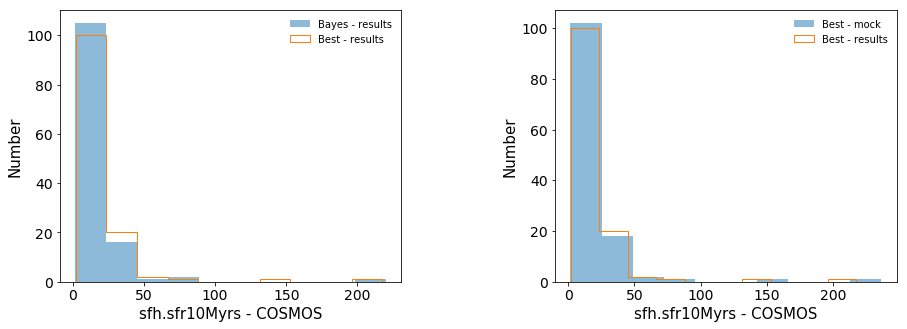

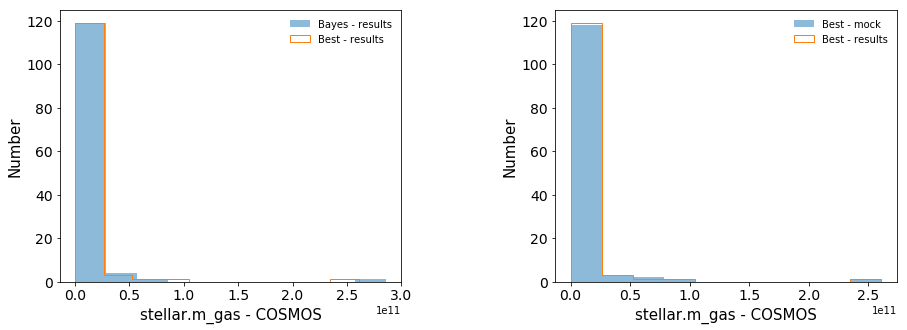

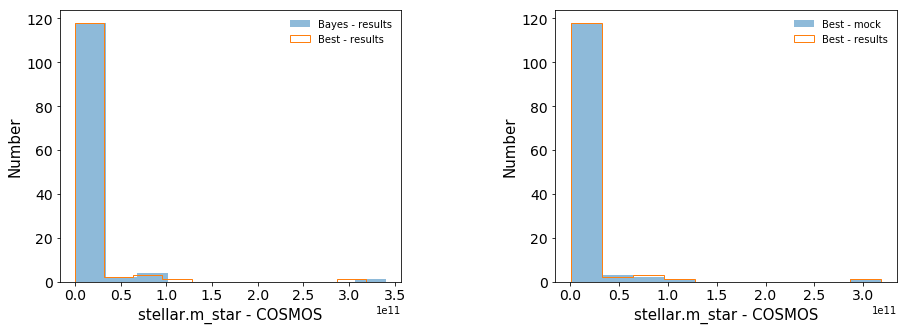

In [222]:
for i in range(len(bayes)):
    
    fig, axs = plt.subplots(1,2, figsize=(15, 5), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

    axs = axs.ravel()
    
    axs[0].hist(COSMOS_HaOIII_results[bayes[i]], histtype = 'barstacked', alpha = 0.5, label = 'Bayes - results')
    axs[0].hist(COSMOS_HaOIII_results[best[i]], histtype = 'step', label = 'Best - results')   
    axs[0].set_xlabel('%s - COSMOS'%bayes[i][6::], fontsize = 15)
    axs[0].set_ylabel('Number', fontsize = 15)
    axs[1].hist(COSMOS_HaOIII_mock[best[i]], histtype = 'barstacked', alpha = 0.5, label = 'Best - mock') 
    axs[1].hist(COSMOS_HaOIII_results[best[i]], histtype = 'step', label = 'Best - results')
    axs[1].set_xlabel('%s - COSMOS'%bayes[i][6::], fontsize = 15)
    axs[1].set_ylabel('Number', fontsize = 15)
    
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[0].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper right')
    
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[1].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper right')

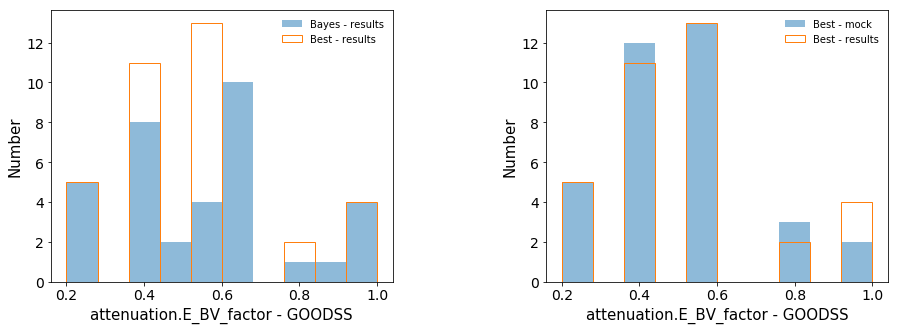

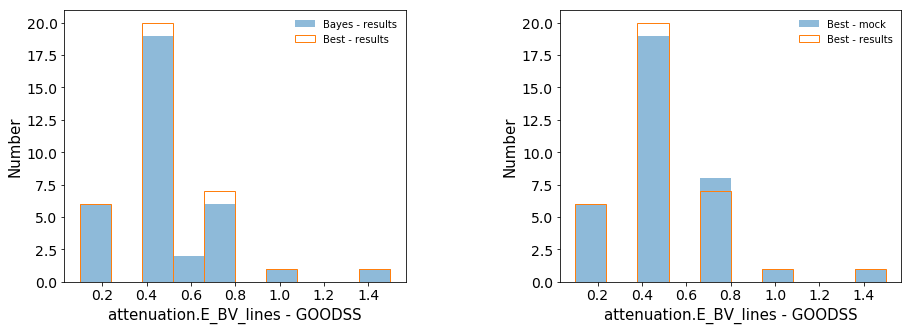

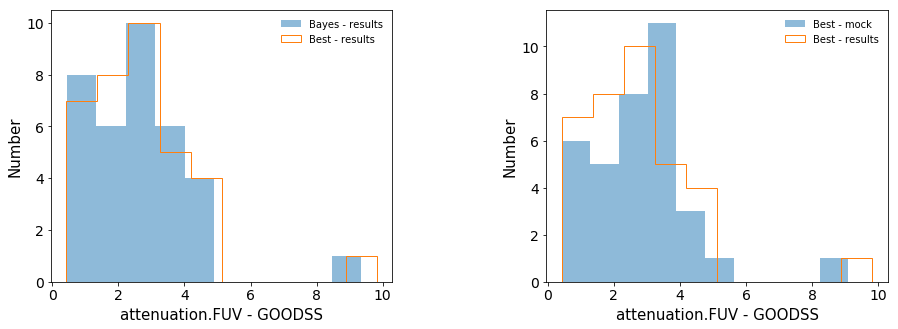

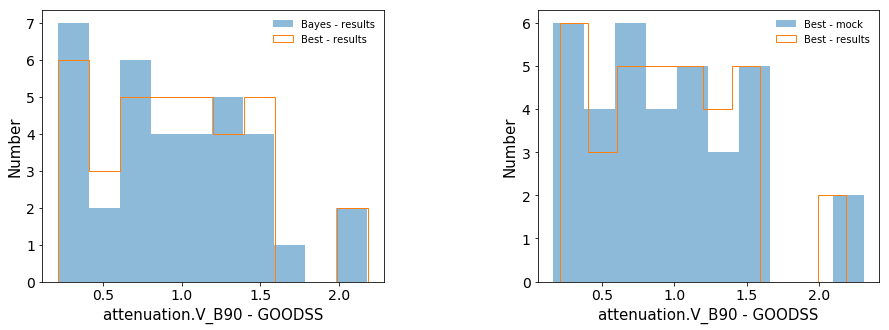

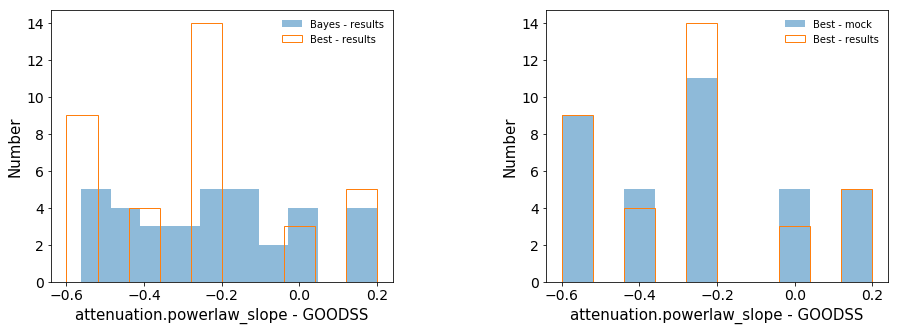

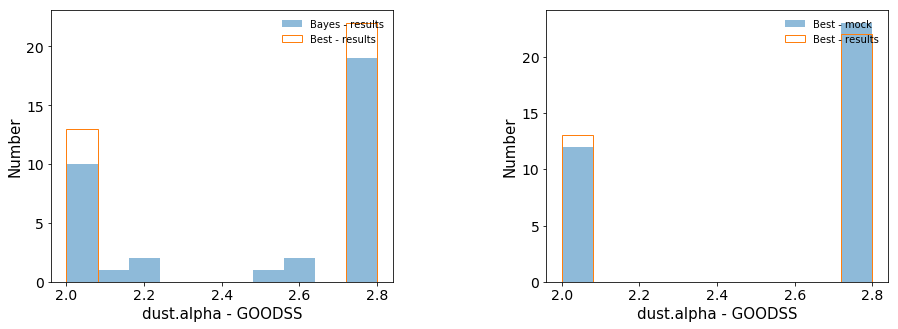

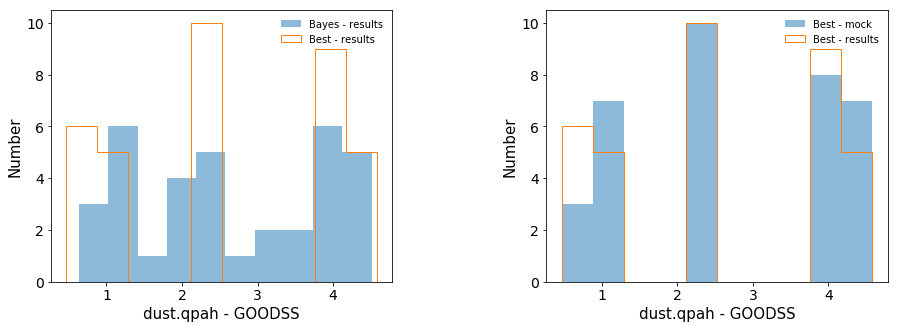

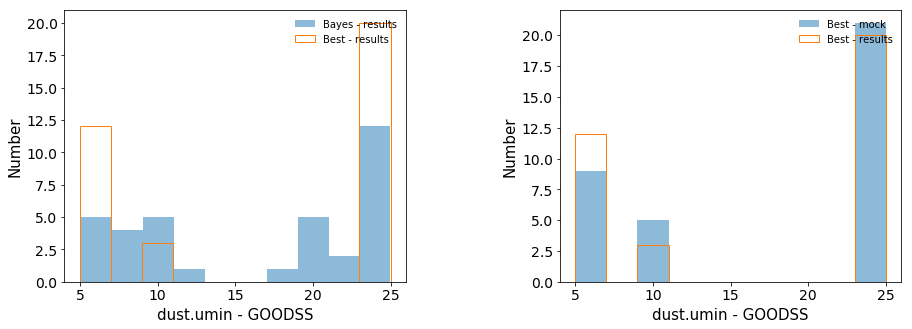

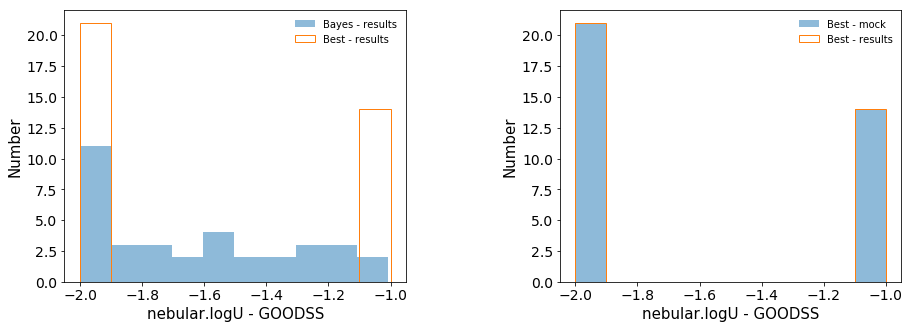

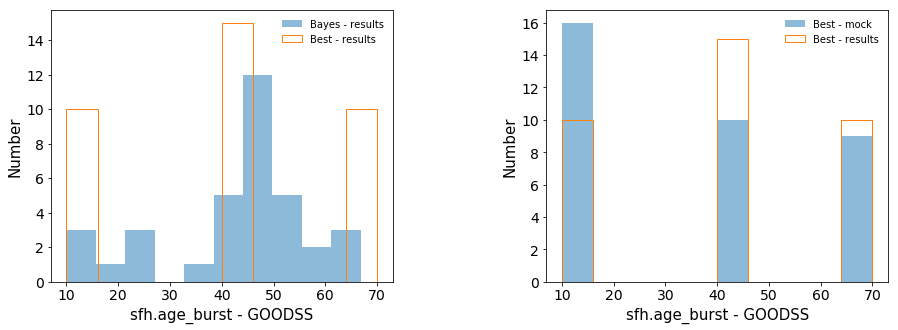

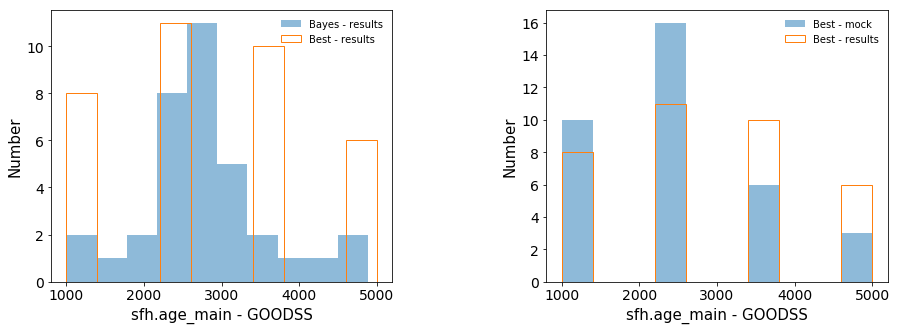

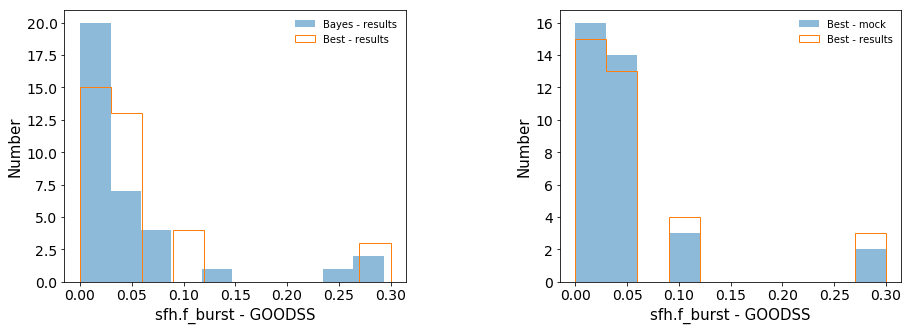

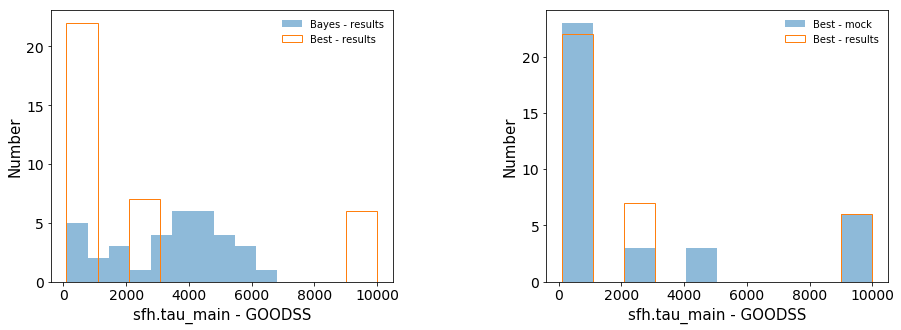

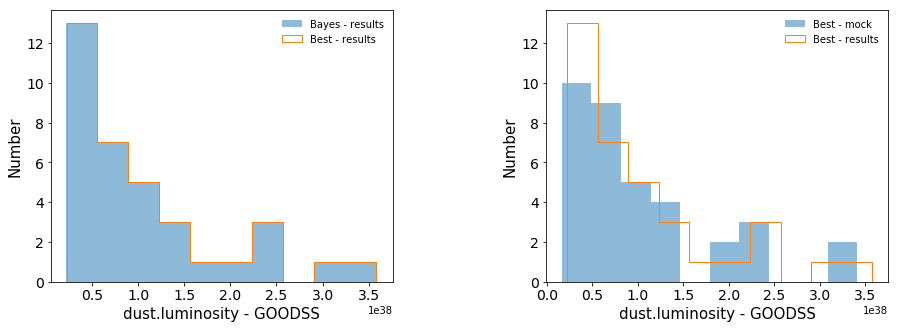

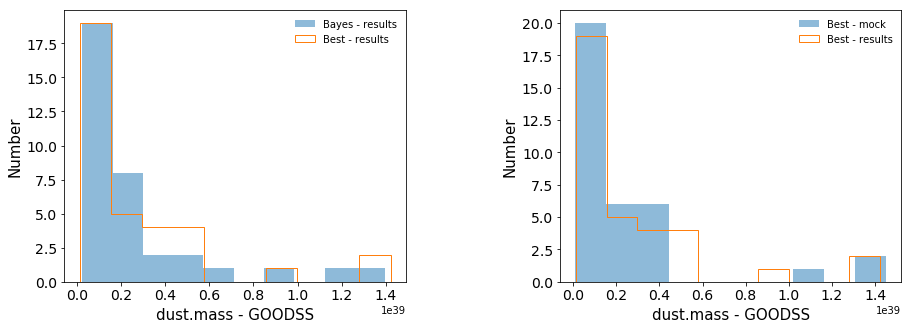

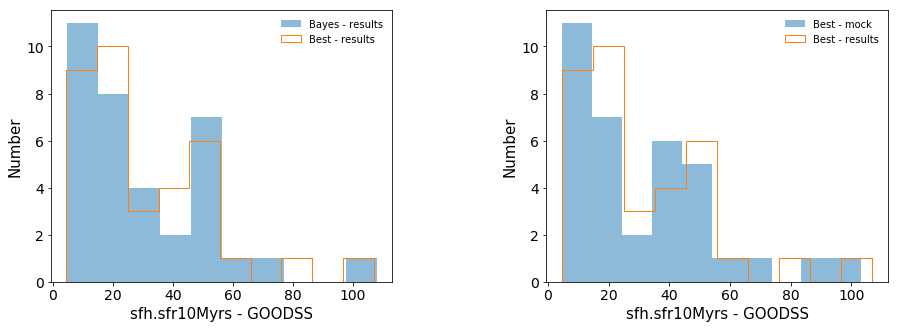

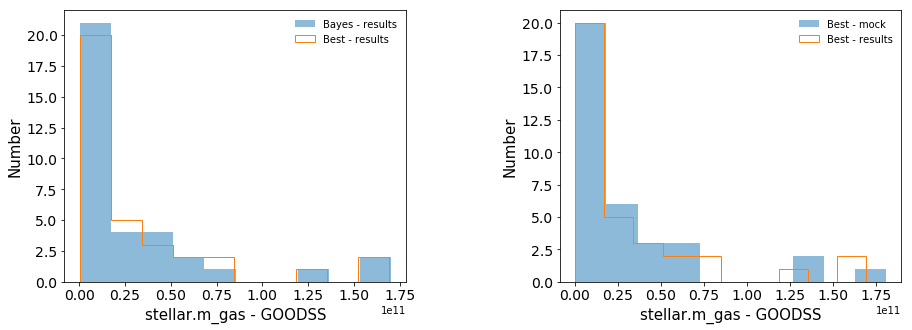

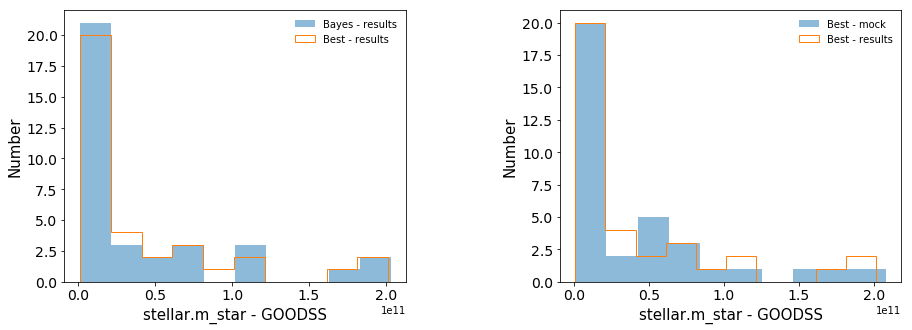

In [223]:
for i in range(len(bayes)):
    
    fig, axs = plt.subplots(1,2, figsize=(15, 5), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

    axs = axs.ravel()
    
    axs[0].hist(GOODSS_HaOIII_results[bayes[i]], histtype = 'barstacked', alpha = 0.5, label = 'Bayes - results')
    axs[0].hist(GOODSS_HaOIII_results[best[i]], histtype = 'step', label = 'Best - results')   
    axs[0].set_xlabel('%s - GOODSS'%bayes[i][6::], fontsize = 15)
    axs[0].set_ylabel('Number', fontsize = 15)
    axs[1].hist(GOODSS_HaOIII_mock[best[i]], histtype = 'barstacked', alpha = 0.5, label = 'Best - mock') 
    axs[1].hist(GOODSS_HaOIII_results[best[i]], histtype = 'step', label = 'Best - results')
    axs[1].set_xlabel('%s - GOODSS'%bayes[i][6::], fontsize = 15)
    axs[1].set_ylabel('Number', fontsize = 15)
    
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[0].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper right')
    
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[1].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper right')

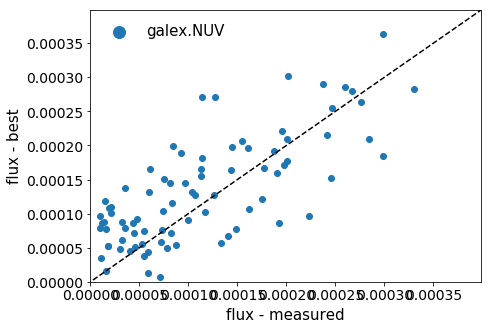

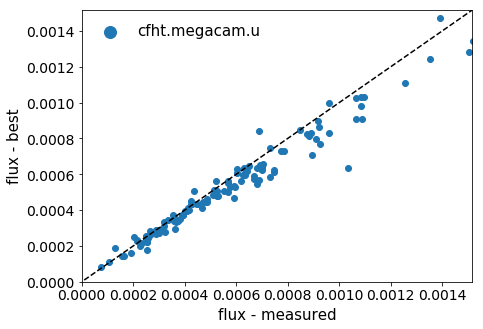

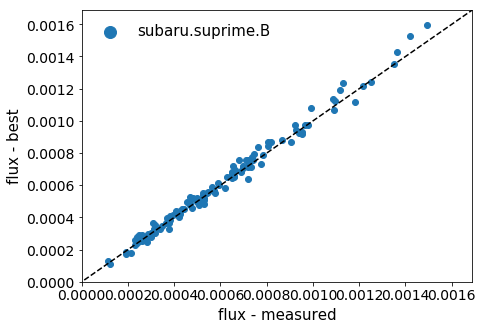

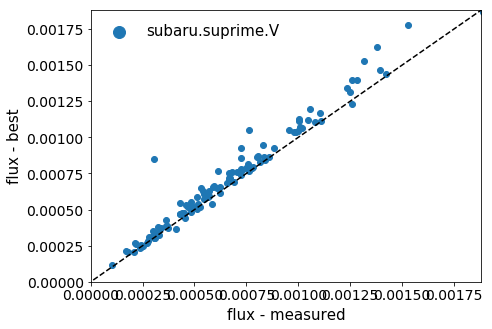

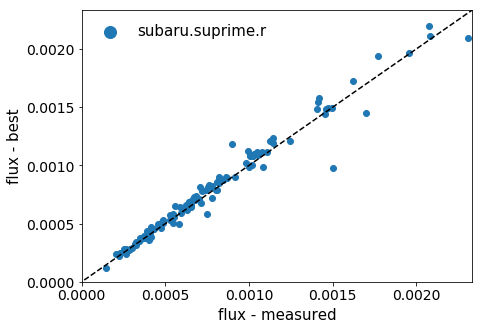

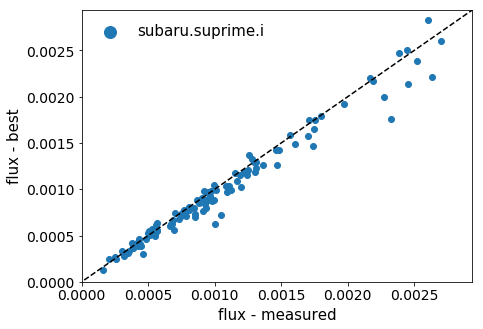

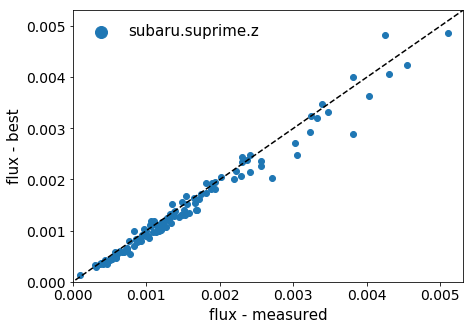

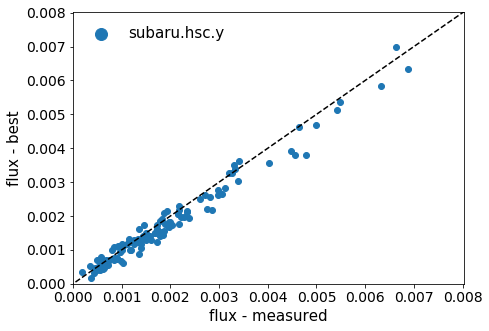

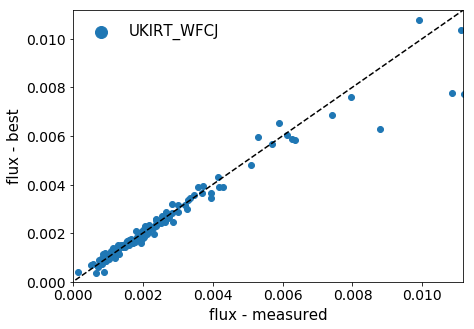

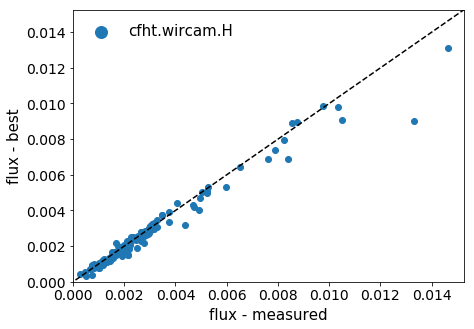

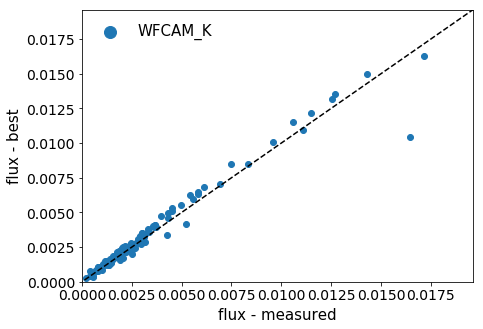

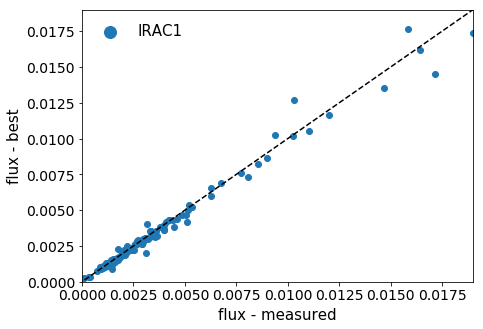

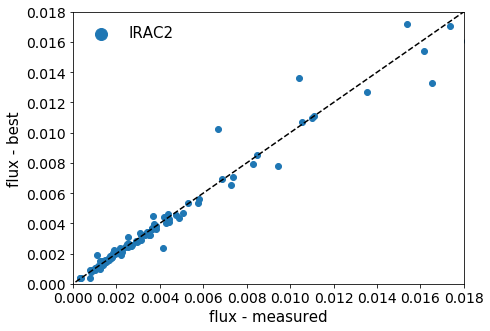

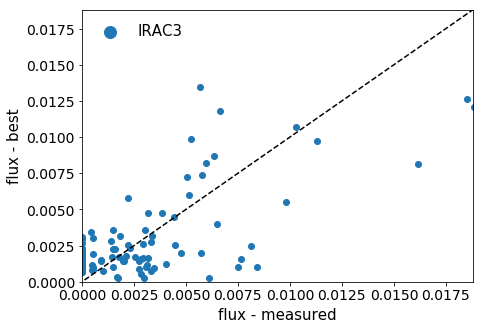

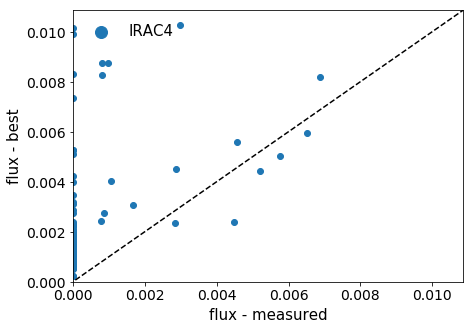

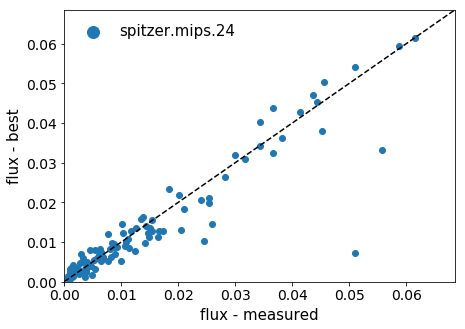

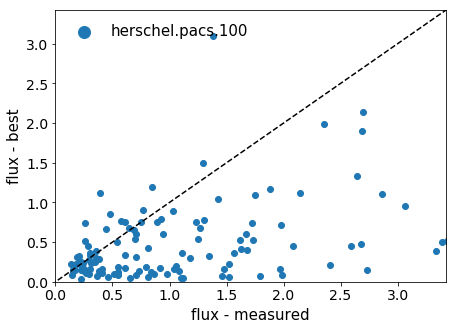

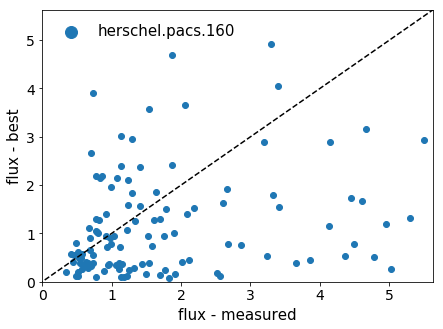

In [210]:
x = np.linspace(-20, 20, 1000)

for i in range(len(flux)):
    
    plt.figure(figsize=(7,5))

    plt.scatter(COSMOS[flux[i]], COSMOS_HaOIII_results['best.'+flux[i]], label = '%s'%flux[i])
    plt.plot(x, x, '--', c = 'k')
    plt.xlabel('flux - measured', fontsize = 15)
    plt.ylabel('flux - best', fontsize = 15)
    plt.xlim(0, np.percentile(COSMOS[flux[i]], 95.0))
    plt.ylim(0, np.percentile(COSMOS[flux[i]], 95.0))
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'upper left')

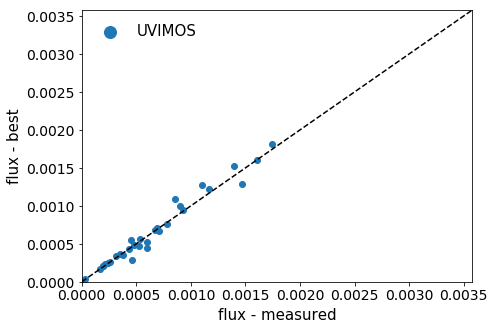

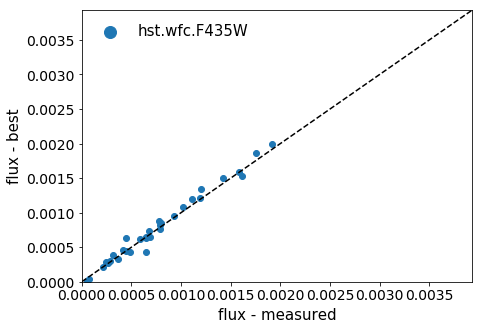

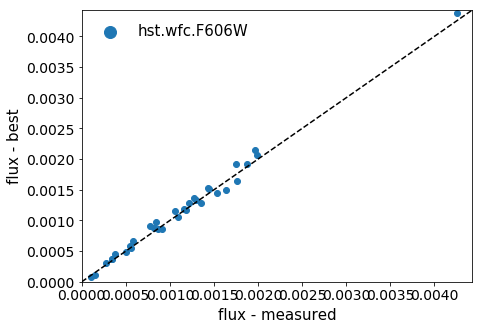

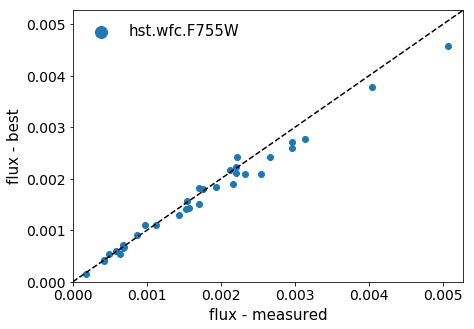

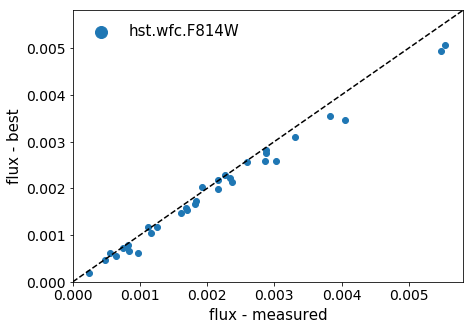

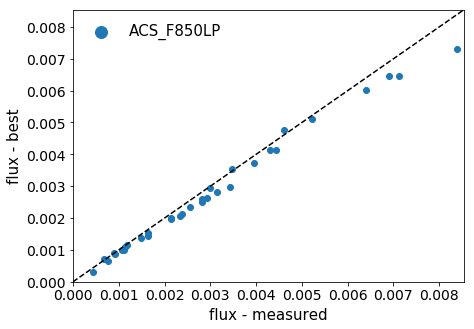

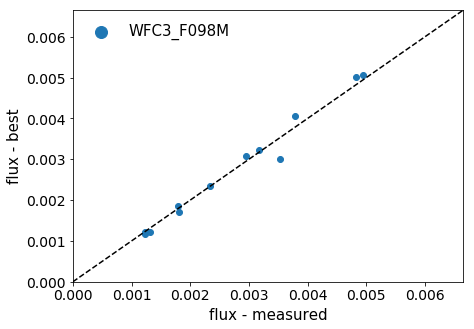

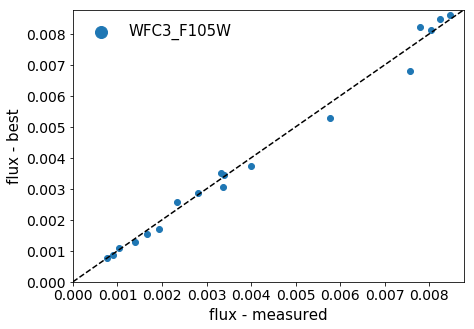

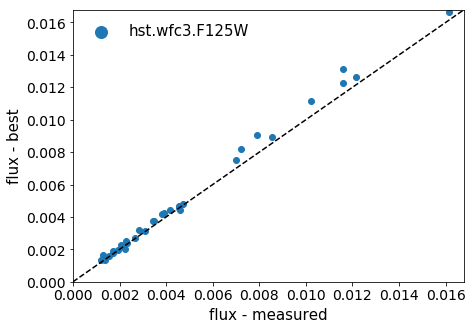

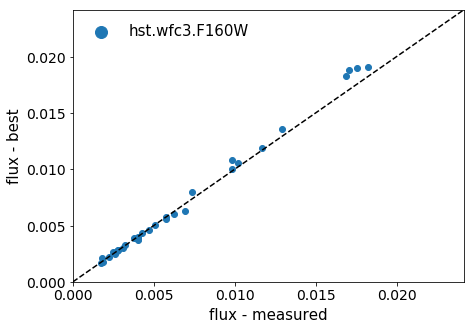

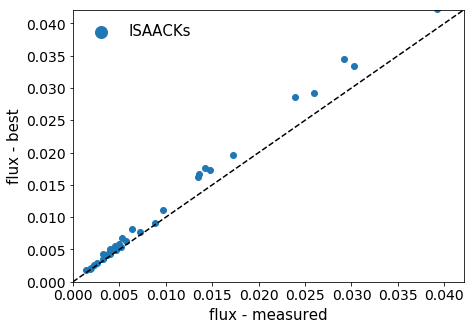

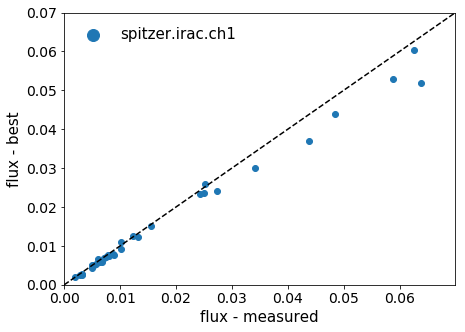

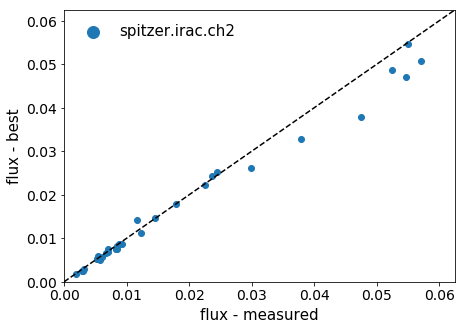

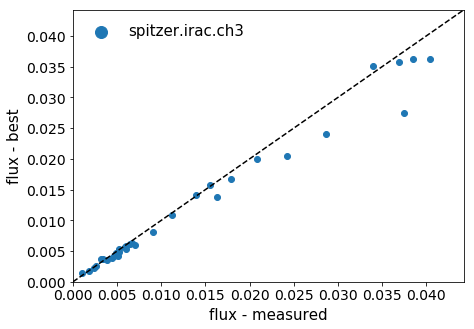

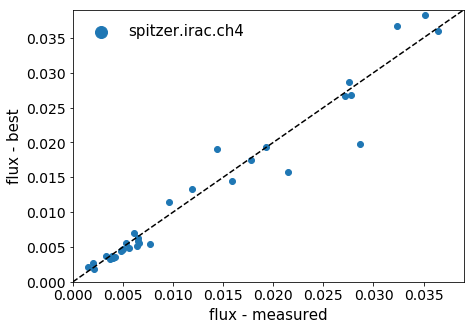

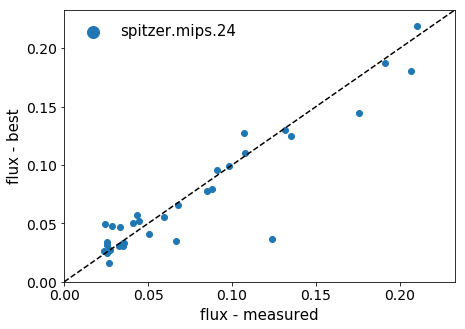

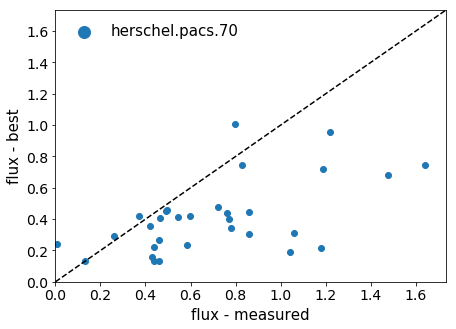

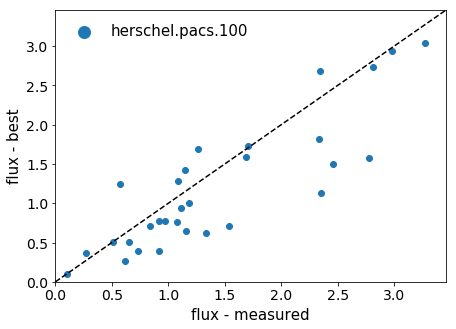

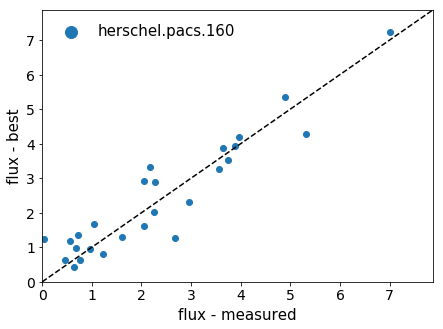

In [211]:
x = np.linspace(0, 10, 1000)

for i in range(len(flux_goodss)):
    
    plt.figure(figsize=(7,5))

    plt.scatter(GOODSS[flux_goodss[i]], GOODSS_HaOIII_results['best.'+flux_goodss[i]], label = '%s'%flux_goodss[i])
    plt.plot(x, x, '--', c = 'k')
    plt.xlabel('flux - measured', fontsize = 15)
    plt.ylabel('flux - best', fontsize = 15)
    plt.xlim(0, np.percentile(GOODSS[flux_goodss[i]], 95.0))
    plt.ylim(0, np.percentile(GOODSS[flux_goodss[i]], 95.0))
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'upper left')

In [179]:
COSMOS[COSMOS['herschel.spire.PMW'] > 0]

id,redshift,galex.NUV,galex.NUV_err,cfht.megacam.u,cfht.megacam.u_err,subaru.suprime.B,subaru.suprime.B_err,subaru.suprime.V,subaru.suprime.V_err,subaru.suprime.r,subaru.suprime.r_err,subaru.suprime.i,subaru.suprime.i_err,subaru.suprime.z,subaru.suprime.z_err,subaru.hsc.y,subaru.hsc.y_err,UKIRT_WFCJ,UKIRT_WFCJ_err,cfht.wircam.H,cfht.wircam.H_err,WFCAM_K,WFCAM_K_err,IRAC1,IRAC1_err,IRAC2,IRAC2_err,IRAC3,IRAC3_err,IRAC4,IRAC4_err,spitzer.mips.24,spitzer.mips.24_err,herschel.pacs.100,herschel.pacs.100_err,herschel.pacs.160,herschel.pacs.160_err,herschel.spire.PSW,herschel.spire.PSW_err,herschel.spire.PMW,herschel.spire.PMW_err,herschel.spire.PLW,herschel.spire.PLW_err,line.NII-654.8+line.H-alpha+line.NII-658.4,line.NII-654.8+line.H-alpha+line.NII-658.4_err,line.H-beta,line.H-beta_err,line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12,line.H-16+line.H-15+line.OII-372.7+line.H-13+line.H-12_err,line.OIII-500.7,line.OIII-500.7_err
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,uJy,uJy,,,,,,,,,,,,,,
bytes25,float64,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64
HELP_J100020.59+021751.61,1.25128,0.00029810748,6.321832e-05,0.0019637801923142457,2.8530516535019424e-05,0.002300287247112293,6.230065758886195e-05,0.00312963930540086,8.503120428280684e-05,0.004231588186300636,8.346594138076528e-05,0.006689485578890966,8.710137222030809e-05,0.011541223617173507,8.548597834704656e-05,0.014292391194932554,0.0002443364530070036,0.019307255178775573,0.0001415665859206884,0.02886012507851355,0.00021212152965692,0.04157748284393004,0.00018278174961593738,0.062981434,0.00039603974,0.073542394,0.0003645212,0.064957835,0.0044401647,0.0798659,0.0065924157,0.42998824,0.005044159,6.403333507478237,3.9246389642357826,14.889729209244251,5.353637412369252,25.861855,1.695209,12.271091,3.8234425,4.7403717,4.2951226,1.1713e-18,1.8500000000000003e-20,3.1030000000000005e-19,5.7e-20,-9999.99,-9999.99,1.5940000000000002e-19,3.57e-20
HELP_J100041.70+021906.19,1.0693,7.355321e-05,6.498491e-05,0.0006811329255123965,3.1001194881505874e-05,0.000717816298300734,4.0817398378033374e-05,0.0010027716944795736,5.8178376342330676e-05,0.001470146042185162,5.8544500656775735e-05,0.0026996384757371427,6.792569357861529e-05,0.004550857857256837,8.779218772978712e-05,0.005477397234719949,0.0002576921094509566,0.007403969099617158,0.00014845274655928944,0.009761969983407219,0.00022301621089397343,0.014291202755596241,0.00019103349119547932,0.018943625,8.85921e-05,0.017342906,7.9928606e-05,0.01850245,0.003858602,0.011862822,0.0062249703,0.0999793,0.0072564012,1.52367795817554,1.3629489112645388,2.8563193045556545,2.5741877034306526,1.8069224,2.0686686,2.2636907,2.5519032,1.3831915,1.6986402,4.765e-19,2.69e-20,3.525e-19,1.5500000000000003e-20,-9999.99,-9999.99,2.397e-19,4.01e-20
HELP_J100041.08+022013.45,1.25692,-9999.99,-9999.99,0.00030355712265238926,2.9046506776318917e-05,0.0003068410298174922,2.9602417030844582e-05,0.0004510861886741664,4.2545516355420335e-05,0.0006211849836792551,4.678690055529089e-05,0.001170276959030255,5.314758608671405e-05,0.002414286718653827,7.894330680950428e-05,0.0032584875003069448,0.00022779746215760566,0.00569445885042682,0.00012715446078001954,0.008757127972698064,0.0001921286220605406,0.012564641070150803,0.00016549808402154805,0.018975187,7.333035e-05,0.01814445,5.1837742e-05,0.0066328575,0.0032461842,0.0,0.0045651756,0.06744583,0.0049099275,1.8767829751595855,0.7082575466483831,8.557181805372238,1.2694820983409882,0.31344205,0.39682207,0.4453856,0.59208935,0.5986353,0.8242639,1.6230000000000002e-19,1.2600000000000002e-20,1.3700000000000003e-20,2.7500000000000004e-20,-9999.99,-9999.99,2.9980000000000003e-19,2

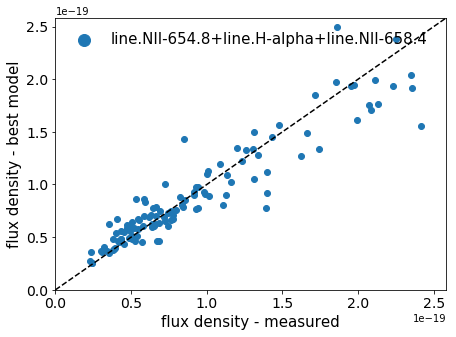

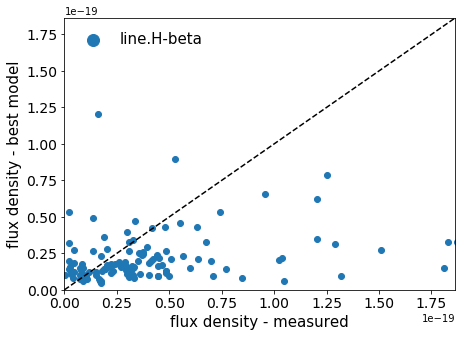

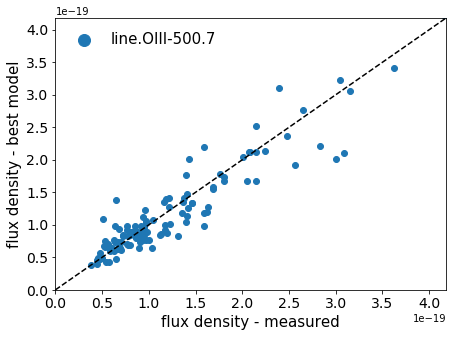

In [215]:
for i in range(len(lines_flux)):
    
    plt.figure(figsize=(7,5))
    
#     mean = np.median(COSMOS[lines_flux[i]])
#     mean_1 = np.median(COSMOS_HaOIII_results['best.'+lines_flux[i]])    

    plt.scatter(COSMOS[lines_flux[i]], COSMOS_HaOIII_results['best.'+lines_flux[i]], label = '%s'%lines_flux[i])
    plt.plot(x, x, '--', c = 'k')
    plt.xlabel('flux density - measured', fontsize = 15)
    plt.ylabel('flux density - best model', fontsize = 15)
    plt.xlim(0, np.percentile(COSMOS[lines_flux[i]], 95.0))
    plt.ylim(0, np.percentile(COSMOS[lines_flux[i]], 95.0))
#     plt.xlim(0, 5)
#     plt.ylim(0, 5)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'upper left')

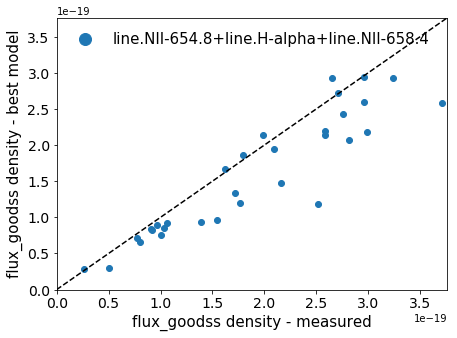

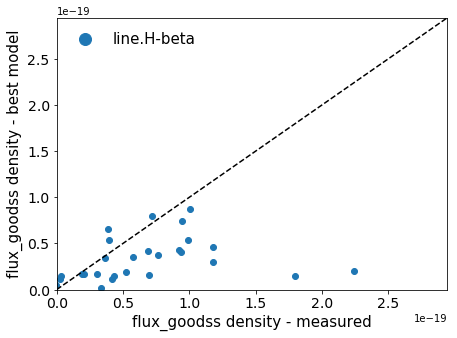

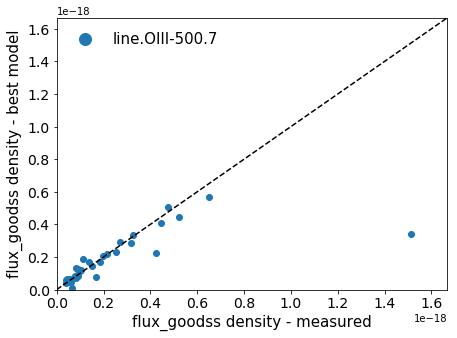

In [216]:
for i in range(len(lines_flux)):
    
    plt.figure(figsize=(7,5))
    
#     mean = np.median(GOODSS[lines_flux[i]])
#     mean_1 = np.median(GOODSS_HaOIII_results['best.'+lines_flux[i]])

    plt.scatter(GOODSS[lines_flux[i]], GOODSS_HaOIII_results['best.'+lines_flux[i]], label = '%s'%lines_flux[i])
    plt.plot(x, x, '--', c = 'k')
    plt.xlabel('flux_goodss density - measured', fontsize = 15)
    plt.ylabel('flux_goodss density - best model', fontsize = 15)
    plt.xlim(0, np.percentile(GOODSS[lines_flux[i]], 95.0))
    plt.ylim(0, np.percentile(GOODSS[lines_flux[i]], 95.0))
#     plt.xlim(0, 5)
#     plt.ylim(0, 5)
    plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
    plt.legend(frameon = False, prop = {'size': 15}, markerscale = 2 , loc = 'upper left')